In [1]:
# save the final model to file
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# run the test harness for evaluating a model
def run_test_harness():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = define_model()
    # fit model
    model.fit(trainX, trainY, epochs=100, batch_size=64, verbose=0)
    # save model
    model.save('final_model.h5')

2023-05-22 11:26:28.354355: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-22 11:26:29.292099: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/local/cuda/extras/CUPTI/lib64
2023-05-22 11:26:29.292206: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/

In [2]:
# entry point, run the test harness
#run_test_harness()

In [3]:
# evaluate the deep model on the test dataset
from keras.datasets import cifar10
from keras.models import load_model
from keras.utils import to_categorical

# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

# run the test harness for evaluating a model
def run_test_harness_load():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # load model
    model = load_model('final_model.h5')
    # evaluate model on test dataset
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))

# entry point, run the test harness
run_test_harness_load()

2023-05-22 11:26:35.039367: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-22 11:26:35.051493: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-22 11:26:35.053181: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-22 11:26:35.055212: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild

> 72.990


In [4]:

# See if normalizing the data to have zero mean and standard deviation 1 improves performance

def prep_pixels_2(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # calculate mean and standard deviation
    train_mean, train_std = train_norm.mean(), train_norm.std()
    test_mean, test_std = test_norm.mean(), test_norm.std()
    # global standardization of pixels
    train_norm = (train_norm - train_mean) / train_std
    test_norm = (test_norm - test_mean) / test_std
    # return normalized images
    return train_norm, test_norm

# run the test harness for evaluating a model
def run_test_harness_1task():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels_2(trainX, testX)
    # define model
    model = define_model()
    # fit model
    model.fit(trainX, trainY, epochs=100, batch_size=64, verbose=0)
    # save model
    model.save('final_model_1task.h5')

# entry point, run the test harness
#run_test_harness_1task()

# evaluate the deep model on the test dataset
from keras.datasets import cifar10
from keras.models import load_model
from keras.utils import to_categorical

def run_test_harness_load_1task():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels_2(trainX, testX)
    # load model
    model = load_model('final_model_1task.h5')
    # evaluate model on test dataset
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))

# entry point, run the test harness
print("Task 1 performance: ")
run_test_harness_load_1task()

Task 1 performance: 
> 74.840


In [5]:
## task 2, Replace the SGD + momentum optimizer with Adam and then AdamW. Do these optimizers lead to better performance and/or faster convergence?
import keras.optimizers


def define_model_2task(optimizer='SGD'):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    if optimizer == 'SGD':
        opt = SGD(lr=0.001, momentum=0.9)
    elif optimizer == 'Adam':
        opt = keras.optimizers.Adam()
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# run the test harness for evaluating a model

def run_test_harness_2task_adam():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels_2(trainX, testX)
    # define model
    model = define_model_2task('Adam')
    # fit model
    model.fit(trainX, trainY, epochs=100, batch_size=64, verbose=0)
    # save model
    model.save('final_model_2task_adam.h5')

# entry point, run the test harness
#run_test_harness_2task_adam()

# evaluate the deep model on the test dataset


def run_test_harness_load_2task_adam():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels_2(trainX, testX)
    # load model
    model = load_model('final_model_2task_adam.h5')
    # evaluate model on test dataset
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))

# entry point, run the test harness
print("Task 2 Adam performance: ")

run_test_harness_load_2task_adam()

Task 2 Adam performance: 
> 75.900


In [6]:
# AdamW

import tensorflow_addons as tfa

def define_model_2task(optimizer='SGD'):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same',
                     input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    if optimizer == 'SGD':
        opt = SGD(lr=0.001, momentum=0.9)
    elif optimizer == 'Adam':
        opt = keras.optimizers.Adam()
    elif optimizer == 'AdamW':
        opt = tfa.optimizers.AdamW(learning_rate=0.001, weight_decay=0.0001)		
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# run the test harness for evaluating a model

def run_test_harness_2task_adam2():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels_2(trainX, testX)
    # define model
    model = define_model_2task('AdamW')
    # fit model
    model.fit(trainX, trainY, epochs=100, batch_size=64, verbose=0)
    # save model
    model.save('final_model_2task_adamW.h5')

# entry point, run the test harness
#run_test_harness_2task_adam2()

# evaluate the deep model on the test dataset

def run_test_harness_load_2task_adamW():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels_2(trainX, testX)
    # load model
    model = load_model('final_model_2task_adamW.h5')
    # evaluate model on test dataset
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))

# entry point, run the test harness
print("Task 2 AdamW performance: ")
run_test_harness_load_2task_adamW()

Task 2 AdamW performance: 
> 79.880


In [7]:
from keras.layers import Dropout, BatchNormalization
from keras.layers import Activation

# task 4 Check if changing the order to Batch Norm then Dropout has an effect on performance.
# Also check if the Dropout and Batch Norm are complementary ie having both Dropout and Batch Norm in the network
# is better or worse than having a network that just has one of these regularization techniques.
def define_model_4(optimizer='SGD', order='BD', use_both=True):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    if use_both or order == 'BD':
        model.add(BatchNormalization())
    if use_both or order == 'DB':
        model.add(Dropout(0.2))
    model.add(Activation('relu'))
    
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(64, (3, 3), kernel_initializer='he_uniform', padding='same'))
    if use_both or order == 'BD':
        model.add(BatchNormalization())
    if use_both or order == 'DB':
        model.add(Dropout(0.2))
    model.add(Activation('relu'))

    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, (3, 3), kernel_initializer='he_uniform', padding='same'))
    if use_both or order == 'BD':
        model.add(BatchNormalization())
    if use_both or order == 'DB':
        model.add(Dropout(0.2))
    model.add(Activation('relu'))

    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    
    # compile model
    if optimizer == 'SGD':
        opt = SGD(lr=0.001, momentum=0.9)
    elif optimizer == 'Adam':
        opt = keras.optimizers.Adam()
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model




In [8]:
def run_test_harness_4BD():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels_2(trainX, testX)
    # define model
    model = define_model_4(optimizer='Adam', order='BD', use_both=True)
    # fit model
    model.fit(trainX, trainY, epochs=100, batch_size=64, verbose=0)
    # save model
    model.save('final_model_task4BD.h5')

# entry point, run the test harness
#run_test_harness_4BD()

# evaluate the deep model on the test dataset

def run_test_harness_load_4_BD():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels_2(trainX, testX)
    # load model
    model = load_model('final_model_task4BD.h5')
    # evaluate model on test dataset
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))


print("BatchNorm then Dropout:")
run_test_harness_load_4_BD()

def run_test_harness_4_DB():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels_2(trainX, testX)
    # define model
    model = define_model_4(optimizer='Adam', order='BD', use_both=True)
    # fit model
    model.fit(trainX, trainY, epochs=100, batch_size=64, verbose=0)
    # save model
    model.save('final_model_task4_DB.h5')

# entry point, run the test harness
#run_test_harness_4_DB()

# evaluate the deep model on the test dataset

def run_test_harness_load_4_DB():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels_2(trainX, testX)
    # load model
    model = load_model('final_model_task4_DB.h5')
    # evaluate model on test dataset
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))

print("Dropout then BatchNorm:")
run_test_harness_load_4_DB()

BatchNorm then Dropout:
> 82.720
Dropout then BatchNorm:
> 82.150


In [9]:
def run_test_harness_4_B_only():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels_2(trainX, testX)
    # define model
    model = define_model_4(optimizer='Adam', order='BD', use_both=True)
    # fit model
    model.fit(trainX, trainY, epochs=100, batch_size=64, verbose=0)
    # save model
    model.save('final_model_task4_B_only.h5')

# entry point, run the test harness
#run_test_harness_4_B_only()

# evaluate the deep model on the test dataset

def run_test_harness_load_4_B_only():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels_2(trainX, testX)
    # load model
    model = load_model('final_model_task4_B_only.h5')
    # evaluate model on test dataset
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))

In [10]:
print("Only BatchNorm:")
run_test_harness_load_4_B_only()


def run_test_harness_4_D_only():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels_2(trainX, testX)
    # define model
    model = define_model_4(optimizer='Adam', order='BD', use_both=True)
    # fit model
    model.fit(trainX, trainY, epochs=100, batch_size=64, verbose=0)
    # save model
    model.save('final_model_task4_D_only.h5')

# entry point, run the test harness
#run_test_harness_4_D_only()

# evaluate the deep model on the test dataset

def run_test_harness_load_4_D_only():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels_2(trainX, testX)
    # load model
    model = load_model('final_model_task4_D_only.h5')
    # evaluate model on test dataset
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))



print("Only Dropout:")
run_test_harness_load_4_D_only()

Only BatchNorm:
> 82.020
Only Dropout:
> 81.880


In [11]:

def evaluate_model(model):
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels_2(trainX, testX)
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> Test Accuracy: %.3f' % (acc * 100.0))

    #loss = model.evaluate(testX, testY, verbose=0)
    print('> Test Loss: %.3f' % _)

In [ ]:
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.experimental import CosineDecay
from tqdm.keras import TqdmCallback
import tensorflow as tf
from tensorflow.keras import backend as K


# learning rate warm-up + cosine annealing

model = load_model('final_model_task4BD.h5')

INIT_LR = 5e-3  # initial learning rate
BATCH_SIZE = 32
EPOCHS = 30
WARMUP_EPOCHS = 5  # number of epochs for warmup

# load dataset
trainX, trainY, testX, testY = load_dataset()
# prepare pixel data
trainX, testX = prep_pixels_2(trainX, testX)

# define the learning rate schedule
cosine_decay = CosineDecay(INIT_LR, decay_steps=EPOCHS - WARMUP_EPOCHS)
warmup_lr = tf.keras.optimizers.schedules.PolynomialDecay(
    initial_learning_rate=0.0,  # start from zero
    end_learning_rate=INIT_LR,  # ramp up to INIT_LR
    decay_steps=WARMUP_EPOCHS
)

def lr_scheduler(epoch, lr):
    if epoch < WARMUP_EPOCHS:
        return warmup_lr(epoch)
    else:
        return cosine_decay(epoch - WARMUP_EPOCHS)

# prepare model for fitting (loss, optimizer, etc)
model.compile(
    loss='categorical_crossentropy',  # we train 10-way classification
    optimizer=Adamax(),  # learning rate will be set by `lr_scheduler`
    metrics=['accuracy']  # report accuracy during training
)

# callback for printing of actual learning rate used by optimizer
class LrHistory(tf.keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs={}):
        print("Learning rate:", K.get_value(model.optimizer.lr))

# fit model
#history = model.fit(
#    trainX, trainY,  # prepared data
#    batch_size=BATCH_SIZE,
#    epochs=EPOCHS,
#    callbacks=[LrHistory(), TqdmCallback(verbose=1)],
#    validation_data=(testX, testY),
#    shuffle=True,
#    verbose=0
#)

"""plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()"""


"plt.plot(history.history['accuracy'])\nplt.plot(history.history['val_accuracy'])\nplt.title('Model accuracy')\nplt.ylabel('Accuracy')\nplt.xlabel('Epoch')\nplt.legend(['Train', 'Test'], loc='upper left')\nplt.show()"

In [13]:
## C Grade

In [ ]:
# Try more extensive data-augmentations (more geometric data-augmentations: affine transformations, scaling and 
# rotation and/or photo-metric augmentations.) and see if this gives a performance boost.

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
# define the data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,  # randomly rotate images in the range (0-20 degrees)
    zoom_range=0.15,  # Randomly zoom image 
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images horizontally
    brightness_range=[0.2,1.0]  # change brightness of images
    )

# fit parameters from data
datagen.fit(trainX)

# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(trainX, trainY, batch_size=9):
    # create a grid of 3x3 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(32, 32, 3), cmap=plt.get_cmap('gray'))
    # show the plot
    plt.show()
    break


In [ ]:
history_C1 = model.fit(
    datagen.flow(trainX, trainY, batch_size=64),
    epochs=30,
    callbacks=[TqdmCallback(verbose=1)],
    validation_data=(testX, testY),
    shuffle=True,
    verbose=0
)

plt.plot(history_C1.history['accuracy'])
plt.plot(history_C1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [111]:
from tensorflow.keras.layers import Input, Add, GlobalAveragePooling2D, Dense, Conv2D, Activation
from tensorflow.keras.models import Model



def define_resnet_like_model():
    inputs = Input(shape=(32, 32, 3))

    # Initial conv block
    x = Conv2D(32, (3, 3), padding='same', kernel_initializer='he_uniform')(inputs)
    x = LayerNormalization()(x)
    x = Activation('relu')(x)

    # First residual block
    skip = x
    x = Conv2D(32, (3, 3), padding='same', strides=(2, 2), activation='relu', kernel_initializer='he_uniform')(x)
    x = LayerNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(32, (3, 3), padding='same', kernel_initializer='he_uniform')(x)
    skip = Conv2D(32, (1, 1), padding='same', strides=(2, 2))(skip)
    x = Add()([x, skip])  # Skip connection
    x = Activation('relu')(x)

    # Additional residual blocks should go here...

    # Global average pooling and output
    x = GlobalAveragePooling2D()(x)
    outputs = Dense(10, activation='softmax')(x)

    model = Model(inputs, outputs)

    opt = keras.optimizers.Adam()
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model


In [117]:
def run_test_harness_resnet():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels_2(trainX, testX)
    # define model
    model = define_resnet_like_model()
    # fit model
    history_C_resnet = model.fit(trainX, trainY, epochs=30, batch_size=64,validation_data=(testX, testY), verbose=2)
    # save model
    model.save('model_resnet.h5')
    
    plt.plot(history_C_resnet.history['accuracy'])
    plt.plot(history_C_resnet.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
# evaluate the deep model on the test dataset

def run_test_harness_load_resnet():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels_2(trainX, testX)
    # load model
    model = load_model('model_resnet.h5')
    # evaluate model on test dataset
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))

Epoch 1/30
782/782 - 10s - loss: 1.7570 - accuracy: 0.3496 - val_loss: 1.5359 - val_accuracy: 0.4322 - 10s/epoch - 13ms/step
Epoch 2/30
782/782 - 9s - loss: 1.4460 - accuracy: 0.4730 - val_loss: 1.3633 - val_accuracy: 0.5073 - 9s/epoch - 11ms/step
Epoch 3/30
782/782 - 9s - loss: 1.3169 - accuracy: 0.5278 - val_loss: 1.3143 - val_accuracy: 0.5223 - 9s/epoch - 11ms/step
Epoch 4/30
782/782 - 9s - loss: 1.2452 - accuracy: 0.5543 - val_loss: 1.2297 - val_accuracy: 0.5547 - 9s/epoch - 11ms/step
Epoch 5/30
782/782 - 9s - loss: 1.1916 - accuracy: 0.5743 - val_loss: 1.1900 - val_accuracy: 0.5735 - 9s/epoch - 11ms/step
Epoch 6/30
782/782 - 9s - loss: 1.1489 - accuracy: 0.5892 - val_loss: 1.1471 - val_accuracy: 0.5851 - 9s/epoch - 11ms/step
Epoch 7/30
782/782 - 9s - loss: 1.1161 - accuracy: 0.6023 - val_loss: 1.1487 - val_accuracy: 0.5871 - 9s/epoch - 11ms/step
Epoch 8/30
782/782 - 9s - loss: 1.0873 - accuracy: 0.6143 - val_loss: 1.1254 - val_accuracy: 0.5930 - 9s/epoch - 11ms/step
Epoch 9/30
782

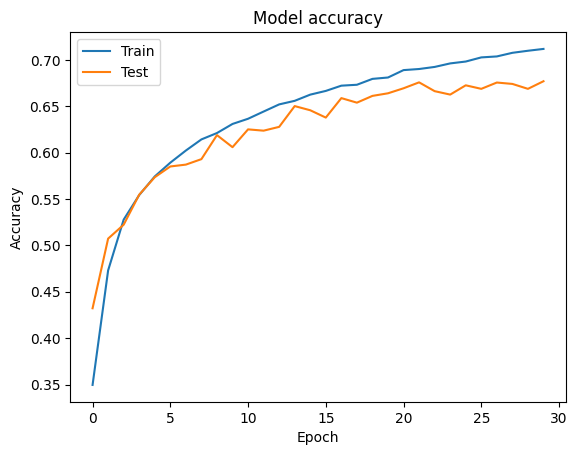

In [118]:
run_test_harness_resnet()



In [73]:
run_test_harness_load_resnet()

> 71.140


In [25]:
import numpy as np
from keras.losses import Loss
import tensorflow as tf


def define_model_noisy(optimizer='SGD', order='BD', use_both=True):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    if use_both or order == 'BD':
        model.add(BatchNormalization())
    if use_both or order == 'DB':
        model.add(Dropout(0.2))
    model.add(Activation('relu'))
    
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(64, (3, 3), kernel_initializer='he_uniform', padding='same'))
    if use_both or order == 'BD':
        model.add(BatchNormalization())
    if use_both or order == 'DB':
        model.add(Dropout(0.2))
    model.add(Activation('relu'))

    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, (3, 3), kernel_initializer='he_uniform', padding='same'))
    if use_both or order == 'BD':
        model.add(BatchNormalization())
    if use_both or order == 'DB':
        model.add(Dropout(0.2))
    model.add(Activation('relu'))

    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    
    # compile model
    if optimizer == 'SGD':
        opt = SGD(lr=0.001, momentum=0.9)
    elif optimizer == 'Adam':
        opt = keras.optimizers.Adam()
    model.compile(optimizer='adam', loss=HuberLoss(delta=1.0), metrics=['accuracy'])
    
    return model



class HuberLoss(Loss):
    def __init__(self, delta=1.0, **kwargs):
        super().__init__(**kwargs)
        self.delta = delta

    def call(self, y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) <= self.delta
        small_error_loss = tf.square(error) / 2
        big_error_loss = self.delta * (tf.abs(error) - 0.5 * self.delta)
        return tf.where(is_small_error, small_error_loss, big_error_loss)


def add_noise_to_labels(y, noise_level):
    num_noisy_labels = int(noise_level * y.shape[0])
    noisy_indices = np.random.choice(y.shape[0], num_noisy_labels, replace=False)

    y_noisy = y.copy()
    for idx in noisy_indices:
        # Create a random one-hot encoded label
        random_label = np.zeros_like(y[idx])
        random_class = np.random.randint(0, y.shape[1])  # Assuming y.shape[1] gives the number of classes
        random_label[random_class] = 1

        y_noisy[idx] = random_label

    return y_noisy



def run_test_harness_noisy():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels_2(trainX, testX)
    # Add noise
    noise_level = 0.2  # This means 20% of the labels will be noisy
    trainY_noisy = add_noise_to_labels(trainY, noise_level)
    # define model --- this model has had the best performance so far.
    model = define_model_noisy(optimizer='Adam', order='BD', use_both=True)
    # fit model
    history_noisy = model.fit(trainX, trainY_noisy, epochs=30, batch_size=32, validation_data=(testX, testY))
    # save model
    model.save('model_noisy.h5')
    
    plt.plot(history_noisy.history['accuracy'])
    plt.plot(history_noisy.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    

    
def run_test_harness_load_noisy():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels_2(trainX, testX)
    # Add noise
    noise_level = 0.2  # This means 20% of the labels will be noisy
    trainY_noisy = add_noise_to_labels(trainY, noise_level)
    # load model
    model = load_model('model_noisy.h5')
    # evaluate model on test dataset
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))

In [30]:
from tqdm import tqdm
def train_models(n_models):
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels_2(trainX, testX)
    # Add noise
    noise_level = 0.2  # This means 20% of the labels will be noisy
    trainY_noisy = add_noise_to_labels(trainY, noise_level)
    models = []
    for _ in tqdm(range(n_models)):
        model = define_model_noisy()
        # train the model
        model.fit(trainX, trainY_noisy, epochs=10, batch_size=32)
        models.append(model)
    return models

def predict_with_ensemble(models, X):
    # make predictions
    preds = [model.predict(X) for model in models]

    # ensemble predictions
    preds = np.array(preds)
    ensemble_preds = np.argmax(np.mean(preds, axis=0), axis=1)
    
    return ensemble_preds


In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_models(models, X_test, y_test):
    # make ensemble predictions
    ensemble_preds = predict_with_ensemble(models, X_test)

    # calculate true labels
    true_labels = np.argmax(y_test, axis=1)

    # calculate scores
    accuracy = accuracy_score(true_labels, ensemble_preds)
    precision = precision_score(true_labels, ensemble_preds, average='weighted')
    recall = recall_score(true_labels, ensemble_preds, average='weighted')
    f1 = f1_score(true_labels, ensemble_preds, average='weighted')

    print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1: {f1}')

In [32]:
# load dataset
trainX, trainY, testX, testY = load_dataset()
# prepare pixel data
trainX, testX = prep_pixels_2(trainX, testX)

models = train_models(5)
evaluate_models(models, testX, testY)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1/10


2023-05-22 17:45:27.033816: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_11/dropout_33/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1563/1563 [==============================] - 15s 8ms/step - loss: 0.0382 - accuracy: 0.3812
Epoch 2/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.0321 - accuracy: 0.5233
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0297 - accuracy: 0.5745
Epoch 4/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.0281 - accuracy: 0.6085
Epoch 5/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.0268 - accuracy: 0.6320
Epoch 6/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.0258 - accuracy: 0.6494
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0250 - accuracy: 0.6654
Epoch 8/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0242 - accuracy: 0.6791
Epoch 9/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0235 - accuracy: 0.6889
Epoch 10/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0229

 20%|██        | 1/5 [02:03<08:13, 123.35s/it]

Epoch 1/10


2023-05-22 17:47:30.428072: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_12/dropout_36/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1563/1563 [==============================] - 15s 7ms/step - loss: 0.0384 - accuracy: 0.3775
Epoch 2/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.0326 - accuracy: 0.5118
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0301 - accuracy: 0.5661
Epoch 4/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.0284 - accuracy: 0.5999
Epoch 5/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.0271 - accuracy: 0.6247
Epoch 6/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.0262 - accuracy: 0.6425
Epoch 7/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.0253 - accuracy: 0.6587
Epoch 8/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0246 - accuracy: 0.6714
Epoch 9/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.0239 - accuracy: 0.6831
Epoch 10/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.0233

 40%|████      | 2/5 [04:05<06:07, 122.56s/it]

Epoch 1/10


2023-05-22 17:49:32.478079: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_13/dropout_39/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1563/1563 [==============================] - 15s 7ms/step - loss: 0.0391 - accuracy: 0.3626
Epoch 2/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.0330 - accuracy: 0.5054
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0304 - accuracy: 0.5578
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0287 - accuracy: 0.5932
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0275 - accuracy: 0.6177
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0266 - accuracy: 0.6356
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0257 - accuracy: 0.6506
Epoch 8/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0250 - accuracy: 0.6630
Epoch 9/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0242 - accuracy: 0.6761
Epoch 10/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0236

 60%|██████    | 3/5 [06:08<04:06, 123.03s/it]

Epoch 1/10


2023-05-22 17:51:36.317507: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_14/dropout_42/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1563/1563 [==============================] - 15s 8ms/step - loss: 0.0384 - accuracy: 0.3785
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0325 - accuracy: 0.5148
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0300 - accuracy: 0.5697
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0284 - accuracy: 0.6014
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0272 - accuracy: 0.6252
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0262 - accuracy: 0.6431
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0253 - accuracy: 0.6608
Epoch 8/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0245 - accuracy: 0.6715
Epoch 9/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.0238 - accuracy: 0.6838
Epoch 10/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0232

 80%|████████  | 4/5 [08:12<02:03, 123.35s/it]

Epoch 1/10


2023-05-22 17:53:39.831029: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_15/dropout_45/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1563/1563 [==============================] - 15s 8ms/step - loss: 0.0389 - accuracy: 0.3626
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0327 - accuracy: 0.5107
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0301 - accuracy: 0.5643
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0285 - accuracy: 0.5998
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0272 - accuracy: 0.6229
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0262 - accuracy: 0.6407
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0253 - accuracy: 0.6590
Epoch 8/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.0245 - accuracy: 0.6727
Epoch 9/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.0239 - accuracy: 0.6820
Epoch 10/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.0232

100%|██████████| 5/5 [10:37<00:00, 127.48s/it]


313/313 [==============================] - 1s 3ms/step
Accuracy: 0.8311, Precision: 0.8330268639948474, Recall: 0.8311, F1: 0.8314742029490115


In [ ]:
#run_test_harness_noisy()

evaluate_models(models, testX, testY)

In [ ]:
# assuming you have binary classification and you're using binary cross-entropy loss
def bootstrap_binary_crossentropy(y_true, y_pred):
    bootstrap_target = 0.95 # the target probability for positive samples
    bootstrap_weight = 0.95 # the weight for positive samples, 1 - this weight will be used for negative samples
    
    # calculate binary cross-entropy as usual
    bce = keras.losses.binary_crossentropy(y_true, y_pred)
    
    # calculate bootstrap target and weight based on true labels
    bootstrap_target_tensor = y_true * bootstrap_target + (1 - y_true) * (1 - bootstrap_target)
    bootstrap_weight_tensor = y_true * bootstrap_weight + (1 - y_true) * (1 - bootstrap_weight)
    
    # apply bootstrap weighting
    bootstrap_bce = bootstrap_weight_tensor * keras.losses.binary_crossentropy(bootstrap_target_tensor, y_pred)
    
    return bootstrap_bce

model.compile(loss=bootstrap_binary_crossentropy, optimizer='adam')



In [95]:
# test harness for evaluating models on the cifar10 dataset
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm


# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig('base_line_plot.png')
    pyplot.close()

# run the test harness for evaluating a model
def run_test_harness():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = define_model()
    # fit model
    history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX, testY), verbose=0)
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)

# entry point, run the test harness
run_test_harness()

> 73.480


In [96]:
# baseline model with dropout on the cifar10 dataset
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD

# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# plot diagnostic learning curves
def summarize_diagnostics(history):

    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig('baseline_dropout_plot.png')
    pyplot.close()

# run the test harness for evaluating a model
def run_test_harness():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = define_model()
    # fit model
    history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX, testY), verbose=0)
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)

# entry point, run the test harness
run_test_harness()

2023-05-20 17:20:35.105936: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_25/dropout_31/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


> 82.860


In [123]:
# baseline model with weight decay on the cifar10 dataset
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.regularizers import l2

# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001), input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.001)))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig('Baseline_weight_decay.png')
	pyplot.close()

# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model
	model = define_model()
	# fit model
	history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX, testY), verbose=0)
	# evaluate model
	_, acc = model.evaluate(testX, testY, verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)

# entry point, run the test harness
run_test_harness()

> 71.410


In [119]:
# baseline model with data augmentation on the cifar10 dataset
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig('baseline_data_aug_plot.png')
	pyplot.close()

# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
	# prepare iterator
	it_train = datagen.flow(trainX, trainY, batch_size=64)
	# fit model
	steps = int(trainX.shape[0] / 64)
	history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=100, validation_data=(testX, testY), verbose=0)
	# evaluate model
	_, acc = model.evaluate(testX, testY, verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)

# entry point, run the test harness
run_test_harness()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:80: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


> 83.700
